# Лабораторная работа 4. Преобразование Фурье

В данной лабораторной работе мы:
* узнаем что такое преобразование Фурье и для чего оно нужно; 
* реализуем собственные функции преобразования Фурье;
* проанализируем спектральные характеристики сигнала.

## Задание 0 Заполнить данные в окне ниже
(для этого необходимо кликнуть два раза на текст ниже)

ФИО студентов: Лисовский Кирилл Алексеевич Никитенко Андрей Михайлович Уксусников Николай Алексеевич Степаненко Дмитрий Владимирович (как пример, номер варианта 27, по времени)

Группа: РИМ-111060 Подгруппа задания: 3

## Подключить необходимые библиотеки

In [362]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.fftpack import fft, ifft, fftshift
import scipy as sp
from scipy import signal


%matplotlib inline

## Теория
В предыдущих работах было изучено, что такое сигнал. В данной работе изучим переход между временной и частотной областями для дискретных сигналов.



### Прямое преобразование Фурье

Чтобы преобразовать сигнал из временной области в частотную и обратно необходимо выполнить операцию под названием дискретное **преобразование Фурье**.

Запишем формулу прямого преобразования Фурье для дискретной последовательности $x(nT)$. Прямым дискретным преобразованием Фурье (ДПФ) называется преобразование последовательности  `x(n), n = 0, ... , N–1` в последовательность `X(k), k = 0, ..., N–1` по следующей формуле:

$X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk}$  

где $k = 0, ..., N-1$.

- $N$ – количество компонент разложения, число измеренных за период значений сигнала;
- $n$ – номер отсчета дискретизированного сигнала, n = 0,1, ... , N–1;	
- $k$ – номер гармоники компонента преобразования, а T — период времени, в течение которого брались входные данные; 
- $W = e^{-2\pi j / N}$ – поворотный множитель.

В этой формуле $X(kT) = X(e^{j\omega T})$ является спектральной плотностью (спектром) дискретной последовательности. Выражение для спектра дискретной последовательности можно найти, заменив в её Z-форме переменную $z = e^{j\omega T}$  

Для аналоговых сигналов выражение суммы превращается в интеграл.

Используя **формулу Эйлера** $e^{j\omega T} = cos(\omega T) + j\cdot sin(\omega T)$, можно определить *вещественную* и *мнимую* составляющие, а также **модуль** и **аргумент** спектральной плотности, которые связаны с вещественной и мнимой частями спектра через формулы теории функции комплексного переменного. 

Модуль:  

$|X(kT)| = \sqrt{Re(X)^2 + Im(X)^2}$ 

Фаза:  

$arg(X(kT)) = \arctan{\frac{Im(X)}{Re(X)}}$ 

Таким образом, ДПФ для $N$ входных отсчетов сигнала ставит в соответствие N спектральных отсчётов. Из формулы ДПФ для вычисления одного спектрального отсчета требуется N операций комплексного умножения и сложения. Поскольку таких операций $N$, то общая вычислительная сложность ДПФ равна $N^2$

### Обратное преобразование Фурье

**Обратное дискретное преобразование Фурье** (ОДПФ) есть перевод последовательности `X(k), k = 0, ..., N–1` в последовательность `x(n), n = 0, ... , N–1` по формуле:

$x(nT) = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot e^{(2\pi j\cdot nk/N)} = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot W^{nk}$  


где `x(n)` –  измеренная последовательность в дискретных временных точках, значения которой являются исходными данными для прямого преобразования и выходными для обратного
`X(k)` – N–последовательность комплексных амплитуд синусоидальных сигналов, образующих исходный сигнал `x(n)`; значения последовательности являются выходными данными для *прямого* преобразования и входными для *обратного*

Поскольку амплитуды спектральных отсчетов - комплексные величины, то по ним можно вычислить одновременно и амплитуду, и фазу сигнала.

**NB:** Как следует из теоремы **Найквиста-Котельникова**, ДПФ точно соответствует непрерывному преобразованию Фурье, если преобразуемая функция есть функция с ограниченным спектром, при этом частота дискретизации **Fд** должна быть не меньше удвоенной максимальной частоты спектра **Fв**. Следует отметить, что для ДПФ справедливы правила и свойства, которые были рассмотрены для Z-преобразования. Матрицей `k * n` элементов можно определить ДПФ. 

### Преобразование Фурье в Python

Python библиотека scipy для вычисления различных преобразований Фурье (синусное, косинусное, прямое, обратное, многомерное, вещественное) содержит одноименный пакет **fftpack**. Для импорта пакета в проект необходимо выполнить команду:

```python
from scipy.fftpack import *
# or
from scipy.fftpack import fft, ifft, fftshift
```

### Список функций из пакета fftpack:

**Быстрое преобразование Фурье**

| **Function** | **Description** |
| --- | --- | 
| `fft(x[, n, axis, overwrite_x])`                    | Прямое БПФ                          |
| `ifft(x[, n, axis, overwrite_x])`                   | Обратное БПФ                        |

### Спектр гармонического сигнала

Рассмотрим, как выглядит спектр гармонического сигнала. Для этого зададимся длиной БПФ `N = 32` отсчёта. Посмотрим, что происходит при вычислении ОБПФ для сигнала, который задан в частотной области в виде единичного отсчета на определенной позиции.

Обратите внимание, что вычисляется прямое БПФ, поскольку операции БПФ и ОБПФ равнозначны и отличаются на константу и знак в поворачивающих множителях.

Спектром сигнала называется совокупность гармонических колебаний, из которых состоит сам сигнал.

Если говорить более строго, то существует два основных типа спектров: амплитудночастотный (амплитудный) и фазочастотный (фазовый) спектр.

**Амплитудным спектром** называется распределение амплитуд гармонических составляющих по частоте, реальная часть.

**Фазовым спектром** называется распределение начальных фаз гармонических составляющих по частоте, мнимая часть.

Задаем сигнал в частотной области

In [363]:
N, M = 32, 4

x = np.zeros((N,M))
x[0][0] = 1
x[1][1] = 1
x[3][2] = 1
x[8][3] = 1

Рассчитаем преобразование Фурье и отобразим спектр, реальную часть и мнимую часть

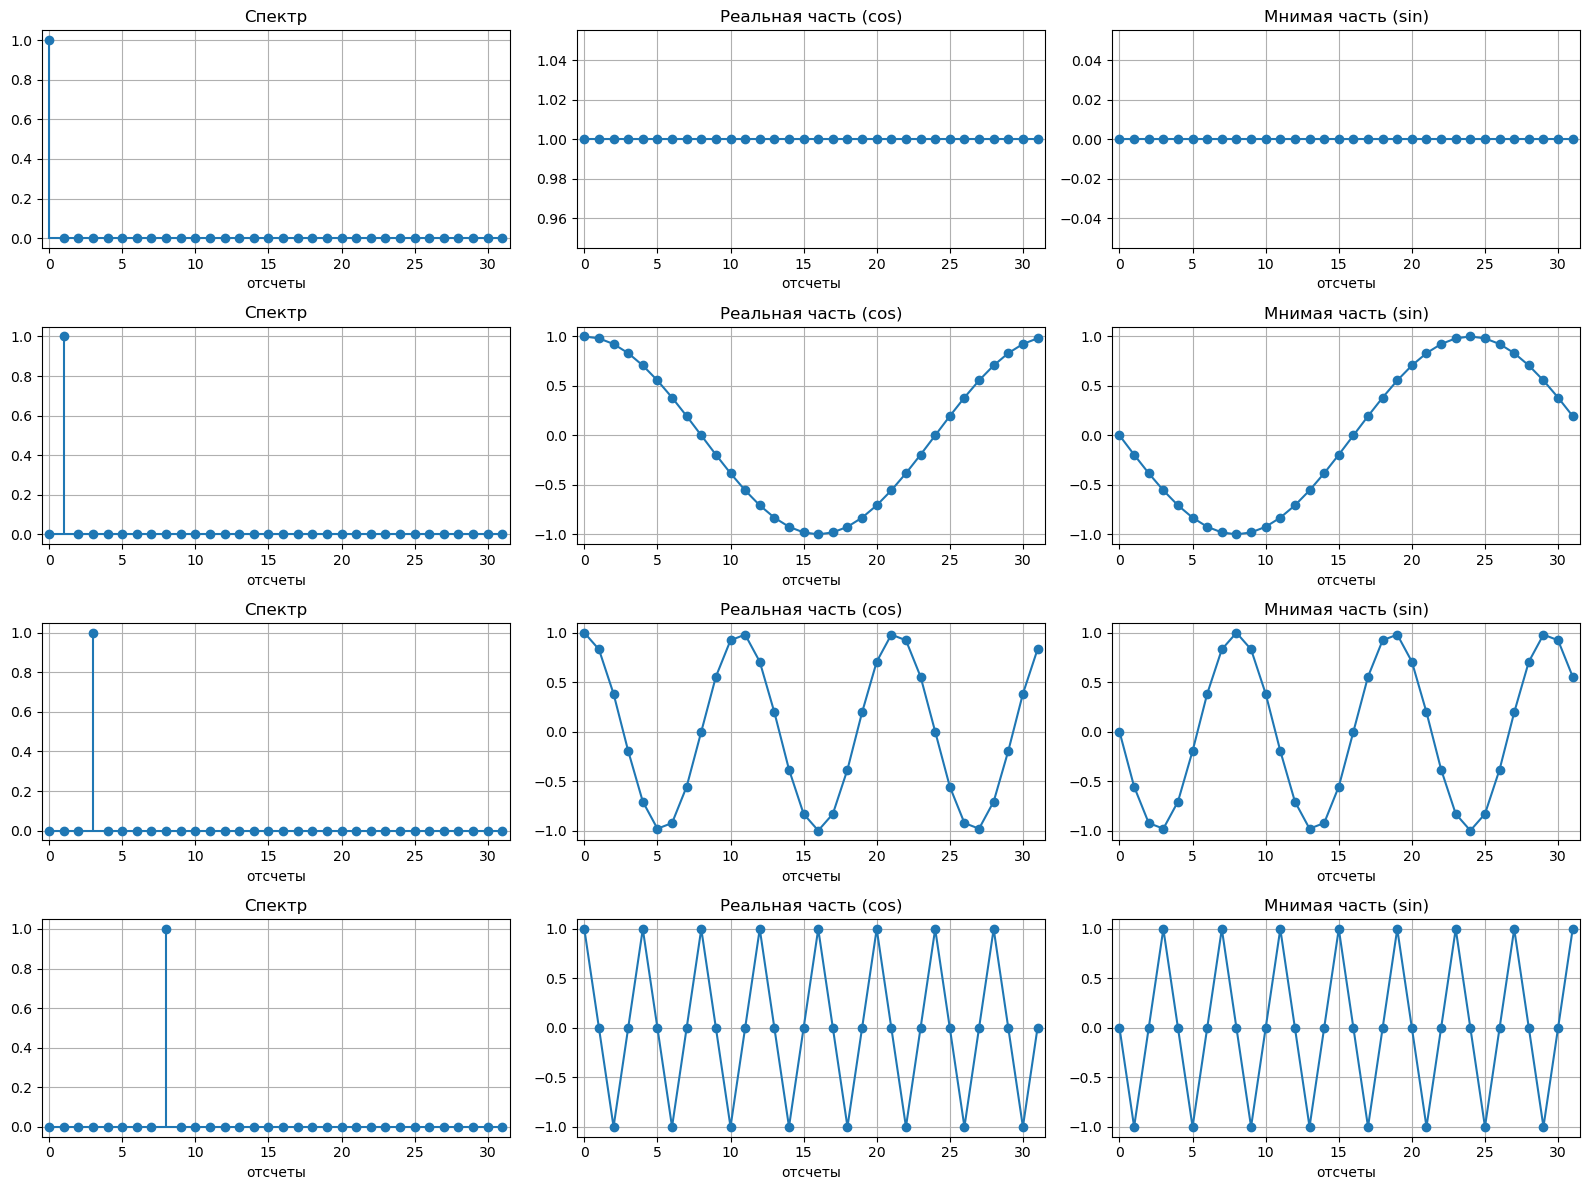

In [364]:
X = fft(x, axis=0)

fig = plt.figure(figsize=(16, 12), dpi=100)
for i in range(M*3):
    plt.subplot(4, 3, i+1)
    if i % 3 == 0:
        plt.title('Спектр')
        plt.stem(x[:,i//3], use_line_collection=True, basefmt='C0')
    if (i-1) % 3 == 0:
        plt.title('Реальная часть (cos)')
        plt.plot(np.real(X[:,i//3]), '-o')
    if (i-2) % 3 == 0:
        plt.title('Мнимая часть (sin)')
        plt.plot(np.imag(X[:,i//3]), '-o')
    plt.xlim([-0.5, N-0.5])
    plt.xlabel('отсчеты')
    plt.grid()
plt.tight_layout()

### Алгоритмы БПФ

Существует два основных метода вычисления БПФ по основанию 2 (Radix-2): с прореживанием по частоте и по времени.

#### БПФ с прореживанием по времени» 
**FFT Decimation-in-time [DIT]** 

Идея заключается в том, что исходная последовательность отсчётов $x(n)$ с длиной N разбивается на две последовательности $x0(n)$ и $x1(n)$ равной длины $N/2$. 

Причем $x0(n)$ - последовательность четных отсчетов -  

$x0(n) = x(2n), n = 0, ..., N/2 - 1$  

а $x1(n)$ - последовательность нечетных отсчетов -  

$x1(n) = x(2n+1), n = 0, ..., N/2 - 1$

Основные правило вычисления БПФ - разбиения последовательности на четные и нечетные.

**Алгоритм**:
- осуществить двоично-инверсную перестановку отсчетов входного сигнала, обеспечив разбиение исходной последовательности;
- сделать N/2 операций «Бабочка» для получения первого объединения, используя поворотные коэффициенты;
- повторить операцию «Бабочка» для перехода на следующие этапы, также используя поворотные коэффициенты.

После всех вышеописанных действий получим на выходе ДПФ входной последовательности. 

#### БПФ с прореживанием по частоте 
**FFT Decimation-in-frequency [DIF]** 

Последовательность отсчётов $x(n)$ с длиной N разбивается на две последовательности $x0(n)$ и $x1(n)$ равной длины $N/2$. 

Причем $x0(n)$ - последовательность первой половины данных -  

$x0(n) = x(n), n = 0, ..., N/2 - 1$  

а $x1(n)$ - последовательность второй половины данных -  

$x1(n) = x(n), n = N/2, ..., N - 1$

Принципиальная разница алгоритмов в том, что при прореживании по времени умножение на поворотные коэффициенты  производилось после ДПФ четной и нечетной последовательности, а при использовании децимации по частоте умножение производится до ДПФ.  

**Алгоритм**:
- сделать N/2 операций «Бабочка» для получения первого объединения, используя поворотные коэффициенты;
- повторить операцию «Бабочка» для перехода на следующие этапы, также используя поворотные коэффициенты.
- осуществить двоично-инверсную перестановку результирующего сигнала; 

Бабочка в этом случае выглядит несколько иначе:

$ X = A + B$ 

$ Y = (A - B)\cdot W^{-k}_{N}$ 

В алгоритме БПФ с децимацией по времени производилось разделение исходного сигнала в соответствии с двоично-инверсной перестановкой – на четные и нечетные части. Тем самым получем первую и вторую половину спектра. В алгоритме с прореживанием по частоте наоборот, исходный сигнал делится пополам, а на выходе получаются две последовательности спектральных отсчетов – четная и нечетная (поэтому алгоритм и называется «прореживание по частоте»). 

#### NB

«Бабочка» - направленный граф, с помощью которого вычисляется пара комплексных отсчетов по предыдущим значениям. Для БПФ с прореживанием по времени бабочка по основанию 2 записывается по формуле:

$ X = A + B\cdot W^{-k}_{N}$ 

$ Y = A - B\cdot W^{-k}_{N}$ 

## Задание

1. Реализовать сигнал согласно номеру в журнале студентов (если такого нет, то по последней цифре номера студенческого билета от 0 до 30)
2. Реализовать тот алгоритм БПФ, который указан для вашего варианта.
3. Применить БПФ реализованный вами и применить указанный выше встроенный метод `fft`
4. Сравнить полученные результаты.
5. Отобразить АЧХ и ФЧХ

0   y=sin(x)+cos(5x)	N=8     по времени

1	y=cos(3x)+sin(2x)	N=8     по частоте

2	y=sin(3x)+cos(x)	N=16     по времени

3	y=cos(2x)+sin(5x)	N=32     по частоте

4	y=sin(2x)+cos(7x)	N=64     по частоте

5	y=cos(x)+sin(x)	    N=8     по времени

6	y=sin(x)+cos(4x)	N=16     по частоте

7	y=cos(5x)+sin(6x)	N=32     по времени

8	y=sin(5x)+cos(x)	N=64     по времени

9	y=cos(x)+sin(2x)	N=8     по частоте

10	y=sin(2x)+cos(x)	N=16     по времени

11	y=cos(5x)+sin(x)	N=32     по времени

12	y=sin(x)+cos(5x)	N=64     по частоте

13	y=cos(3x)+sin(2x)	N=64     по времени

14	y=sin(3x)+cos(x)	N=32     по частоте

15	y=cos(2x)+sin(5x)	N=16     по времени

16	y=sin(2x)+cos(7x)	N=8     по времени

17	y=cos(x)+sin(x)	    N=64     по времени

18	y=sin(x)+cos(4x)	N=32     по частоте

19	y=cos(5x)+sin(6x)	N=16     по времени

20	y=sin(5x)+cos(x)	N=8     по частоте

21	y=cos(x)+sin(2x)	N=64     по частоте

22	y=sin(2x)+cos(x)	N=32     по времени

23	y=cos(5x)+sin(x)	N=16     по частоте

24	y=sin(x)+cos(5x)	N=8     по частоте

25	y=cos(6x)+sin(4x)	N=16     по времени

26	y=sin(6x)+cos(2x)	N=8     по частоте

27	y=cos(4x)+sin(3x)	N=64     по времени

28	y=sin(4x)+cos(5x)	N=32     по частоте

29	y=cos(3x)+sin(2x)	N=16     по частоте

30  y=cos(7x)+sin(3x)   N=32     по времени

## Реализовать сигнал согласно варианту

In [365]:
# 27 y=cos(4x)+sin(3x) N=64 по времени

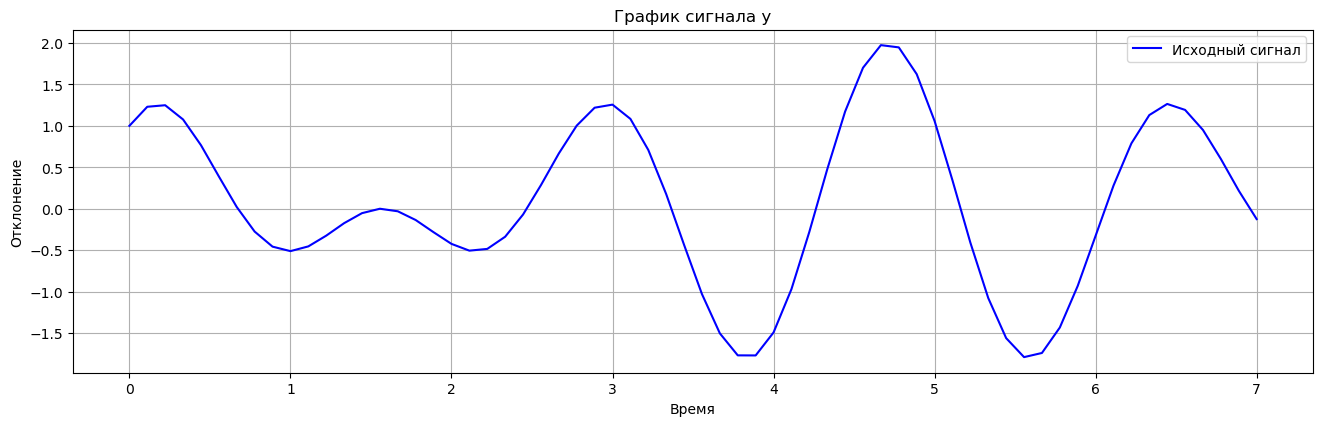

In [366]:
def MySignal(manyX):
    resultY = []
    for x in manyX:
        resultY.append(np.cos(4*x)+np.sin(3*x))
    return resultY

N=64

t = np.linspace(0, 7, N)
y = MySignal(t)

fig = plt.figure(figsize=(16, 10), dpi=100)
plt.subplot(2, 1, 1)
plt.plot(t, y, color='blue', label='Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Отклонение')
plt.title('График сигнала y')
plt.legend()
plt.grid()

## Реализовать БПФ согласно варианту

In [367]:
def lostPart(x, v= "Imag"):
    newX = []
    for i in x:
        if v == "Imag":
            newX.append(i.real)
        elif v == "Real":
            newX.append(i.imag)
        else:
            return 1
    return newX

def MyFuncForPoint(n):
    def MyFunc(manyY):
        res = 0
        for i in range(len(manyY)):
            res += manyY[i]*(np.e**(-2j*n*i*np.pi / len(manyY)))
        return res
    return MyFunc

def myFFT1(manyY):
    resss = []
    for i in range(len(manyY)):
        func = MyFuncForPoint(i)
        resss.append(func(manyY))
    return resss

def myFFT(x):
    N = len(x)
    if N == 2:
        return [x[0]+x[1], x[0]-x[1]]
    X_even = myFFT(x[::2])
    X_odd = myFFT(x[1::2])
    factor = np.e**(-2j*np.pi*np.arange(N) / N)
    return np.concatenate([X_even + factor[:N // 2] * X_odd, 
                         X_even + factor[N // 2:] * X_odd])

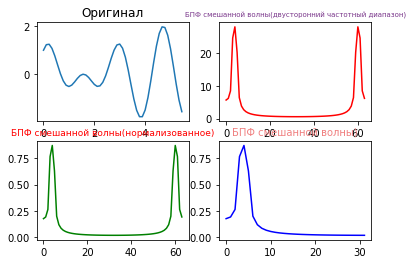

In [368]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn


x=np.linspace(0,7,64)

# Установите сигнал для дискретизации
y=np.cos(4*x)+np.sin(3*x)

yy=fft(y)                     # Быстрое преобразование Фурье
yreal = yy.real               # Получите настоящую часть
yimag = yy.imag               # Получите мнимую часть

yf=abs(fft(y))                # Modulo
yf1=abs(fft(y))/((len(x)/2))           # Обработка нормализации
yf2 = yf1[range(int(len(x)/2))]  # Из-за симметрии берется только половина интервала

xf = np.arange(len(y))        # Частота
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  # Взять половину интервала

# Оригинальная волна
plt.subplot(221)
plt.plot(x[0:50],y[0:50])
plt.title('Оригинал')
# БПФ смешанной волны (двусторонний частотный диапазон)
plt.subplot(222)
plt.plot(xf,yf,'r') # Отображение модуля БПФ исходного сигнала
plt.title('БПФ смешанной волны(двусторонний частотный диапазон)',fontsize=7,color='#7A378B')
# БПФ смешанной волны (нормализованное)
plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('БПФ смешанной волны(нормализованное)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('БПФ смешанной волны)',fontsize=10,color='#F08080')


plt.show()

In [369]:
def test_myFFT(y):
    transform = fft(y, N)
    print ("FFT : ", transform)
        
    return transform

In [370]:
transform = test_myFFT(y)

FFT :  [  5.63661165 -0.j           6.12749382 +0.45732776j
   8.39958471 +0.82060788j  24.46950871 -2.07722408j
 -14.94732717+23.61603605j  -2.22300064-20.07563606j
  -1.38533678 -6.23058839j  -0.73696053 -3.72287446j
  -0.35909127 -2.67755319j  -0.12097307 -2.09779144j
   0.03927435 -1.72419933j   0.15260286 -1.46001913j
   0.23585453 -1.26101406j   0.29886171 -1.10407483j
   0.34769773 -0.97592769j   0.38628911 -0.8683854j
   0.41727122 -0.77610934j   0.44246885 -0.69545913j
   0.46317906 -0.62385912j   0.48034455 -0.55942939j
   0.4946636  -0.50076049j   0.50666179 -0.44677052j
   0.5167401  -0.39661118j   0.52520781 -0.34960421j
   0.53230552 -0.30519719j   0.53822142 -0.26293211j
   0.54310303 -0.22242241j   0.5470657  -0.1833359j
   0.55019887 -0.14538177j   0.55257058 -0.10830031j
   0.55423079 -0.07185484j   0.55521366 -0.03582481j
   0.5555391  -0.j           0.55521366 +0.03582481j
   0.55423079 +0.07185484j   0.55257058 +0.10830031j
   0.55019887 +0.14538177j   0.5470657  +

## Сравнить результаты применения своих функций и встроенной в функции fft()



### Построить сигнал, АЧХ и ФЧХ и обяснить. что получилось 
АЧХ и ФЧХ строить с помощью своих функций и с помощью встроенных. Все графики должны быть оформлены.

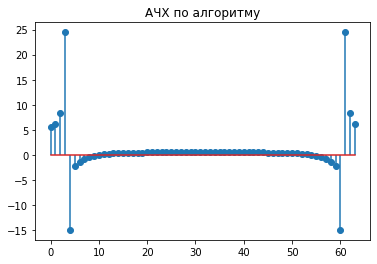

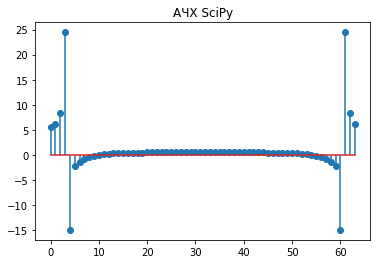

In [371]:
fft_my = myFFT(y)
fft_python = fft(y)

# АЧХ необходимо подписать оси!
plt.stem(lostPart(fft_my, "Imag"),use_line_collection=True)
plt.title("АЧХ по алгоритму")
plt.show()
plt.stem(lostPart(fft_python, "Imag"), use_line_collection=True)
plt.title("АЧХ SciPy")
plt.show()

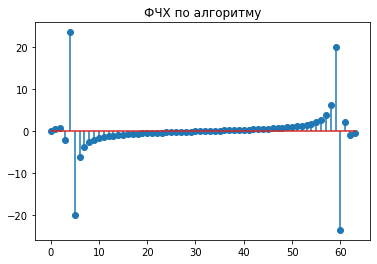

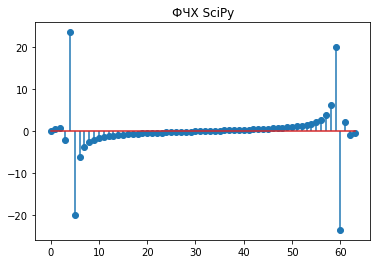

In [372]:
# ФЧХ необходимо подписать оси!
plt.stem(lostPart(fft_my, "Real"), use_line_collection=True)
plt.title("ФЧХ по алгоритму")
plt.show()
plt.stem(lostPart(fft_python, "Real"), use_line_collection=True)
plt.title("ФЧХ SciPy")
plt.show()

### Что получилось?
(для ответа кликнуть два раза на окно ниже)

Убедились, что графики АЧХ/ФЧХ попарно совпали. Реализация БПФ по алгоритму идентична реализации БПФ из библиотеки SciPy.

## Применим наши БПФ к меандру

Меандр описывается формулой:

$y(t) = sign(sin(t))$

Text(0.5, 1.0, 'График сигнала y')

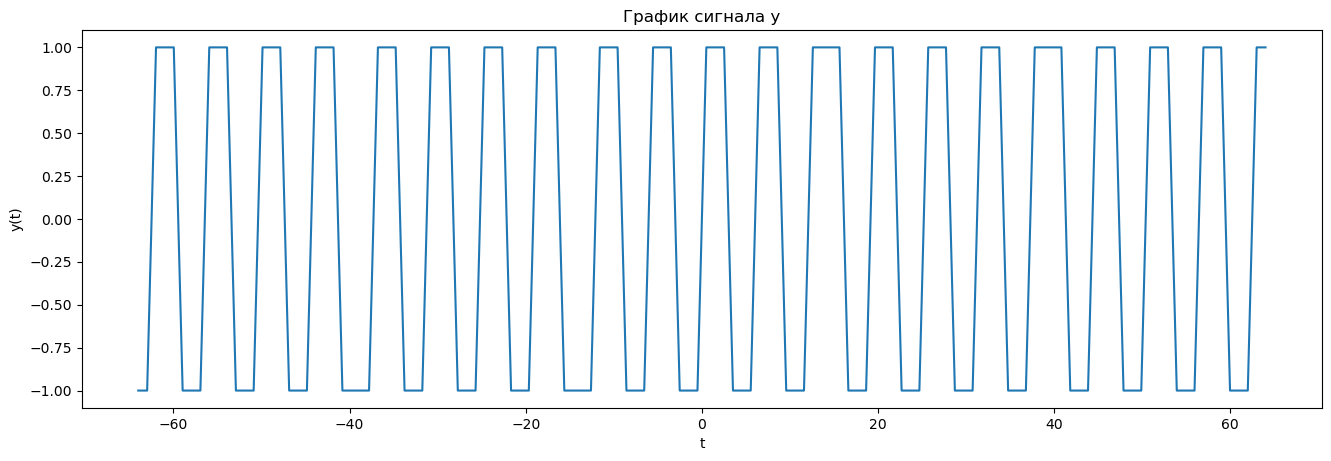

In [373]:
t = np.linspace(-N, N, 2 * N)
y = np.sign(np.sin(t)) # меандр

# отобразить
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('График сигнала y')

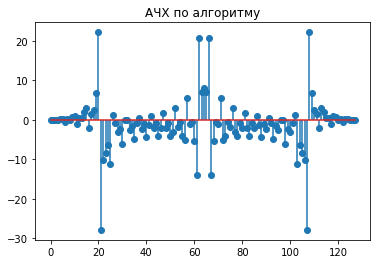

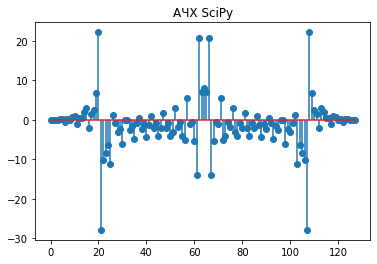

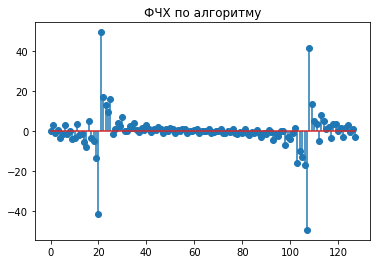

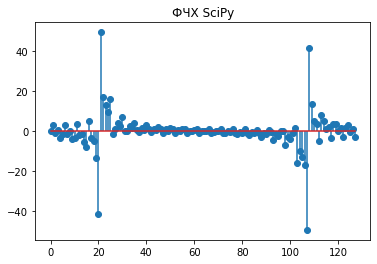

In [374]:
fft_my = myFFT(y)
fft_python = fft(y)

# АЧХ необходимо подписать оси!
plt.stem(lostPart(fft_my, "Imag"),use_line_collection=True)
plt.title("АЧХ по алгоритму")
plt.show()
plt.stem(lostPart(fft_python, "Imag"), use_line_collection=True)
plt.title("АЧХ SciPy")
plt.show()

# ФЧХ необходимо подписать оси!
plt.stem(lostPart(fft_my, "Real"), use_line_collection=True)
plt.title("ФЧХ по алгоритму")
plt.show()
plt.stem(lostPart(fft_python, "Real"), use_line_collection=True)
plt.title("ФЧХ SciPy")
plt.show()

### Что наблюдаете?

Мы получили график сигнала типа "меандр". Убедились, что графики АЧХ/ФЧХ попарно совпали. Реализация БПФ по алгоритму идентична реализации БПФ из библиотеки SciPy.

### Применить функцию Обратного преобразования фурье к меандру. ОТобразить полученный сигнал  исходный сигнал.

`ifft(x[, n, axis, overwrite_x])`

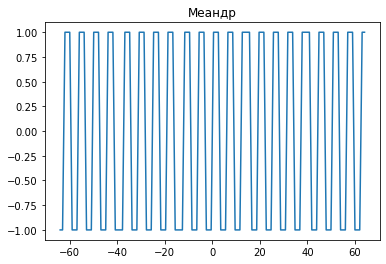

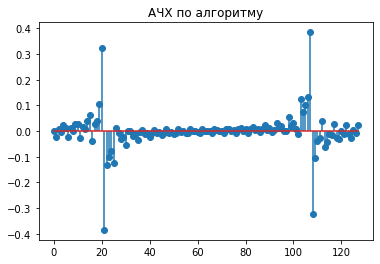

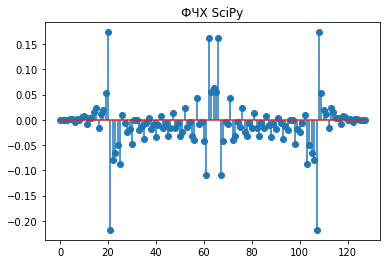

In [378]:
meandr = ifft(y)
plt.plot(t, y)
plt.title("Меандр")
plt.show()

plt.stem(lostPart(meandr, "Real"), use_line_collection=True)
plt.title("АЧХ по алгоритму")
plt.show()

plt.stem(lostPart(meandr, "Imag"), use_line_collection=True)
plt.title("ФЧХ SciPy")
plt.show()

### Объясните полученный результат

Для ОПФ и ППФ получены одинаковые АЧХ и ФЧХ.

## Выводы

0. В данной работе были рассмотрены ППФ и ОПФ, построены АЧХ и ФЧХ с помощью функций по алгоритму и с помощью встроенных библиотек Python. Кроме того, построены АЧХ и ФЧХ для меандра, выполнено ОПФ для меандра.
1. Таким образом, прореживание по времени можно считать алгоритмом разделения последовательности на две последовательности половинной длительности. Первая половина ДПФ есть сумма ДПФ $S_0(k)$ «четной» последовательности $s_0(m)$ и ДПФ $S_1(k)$ «нечетной» последовательности $s_1(m)$, умноженного на поворотные коэффициенты $W_N^k$.
2. Принципиальная разница алгоритмов в том, что при прореживании по времени умножение на поворотные коэффициенты производилось после ДПФ четной и нечетной последовательности, а при использовании децимации по частоте умножение производится до ДПФ.
3. При реализации алгоритма БПФ с прореживанием по времени происходит разбиение вектора на две части – четную и нечетную, после чего выполняется операция бабочка.
4. При реализации алгоритма БПФ с прореживанием по частоте первоначально выполняется операция бабочка, а затем проводится разбиение вектора на две части («верхнюю» и «нижнюю»).
5.  Быстрым преобразованием Фурье (БПФ) называют набор алгоритмов, реализация которых приводит к существенному уменьшению вычислительной сложности ДПФ. Основная идея БПФ состоит в том, чтобы разбить исходный N-отсчетный сигнал x(n) на два более коротких сигнала, ДПФ которых могут быть скомбинированы таким образом, чтобы получить ДПФ исходного N-отсчетного сигнала.